<a href="https://colab.research.google.com/github/roshantac/ERA/blob/main/Session11/Gradcam_resnet18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/roshantac/EVA4.git
!cp EVA4/Assignment10/*.py .

Cloning into 'EVA4'...
remote: Enumerating objects: 2257, done.
remote: Counting objects: 100% (206/206), done.
remote: Compressing objects: 100% (199/199), done.
remote: Total 2257 (delta 98), reused 28 (delta 6), pack-reused 2051
Receiving objects: 100% (2257/2257), 19.76 MiB | 16.60 MiB/s, done.
Resolving deltas: 100% (393/393), done.


In [ ]:
!pip3 install albumentations

In [3]:
########################################
#  Calling  heavenly Gods
########################################
import torch
import torchvision
import torchvision.transforms as transforms
from dataset import *
from model import *
import torch.nn as nn
import torch.nn.functional as F
#from base_functions import *
from traing import *
from torchsummary import summary

# getting the data
trainloader, testloader, testData, classes = get_data_alb()



/usr/local/lib/python3.10/dist-packages/albumentations/augmentations/dropout/cutout.py:50: FutureWarning: Cutout has been deprecated. Please use CoarseDropout
  warnings.warn(


100%|██████████| 170498071/170498071 [00:13<00:00, 13074546.98it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Files already downloaded and verified


In [4]:
# Utilize GPU if available
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = ResNet18().to(device)
if device == 'cuda':
    model = torch.nn.DataParallel(model)
    cudnn.benchmark = True

# Print Model Summary
summary(model, input_size=(3, 32, 32))


cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1,

/content/lr_finder.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


  0%|          | 0/500 [00:00<?, ?it/s]

Learning rate search finished. See the graph with {finder_name}.plot()


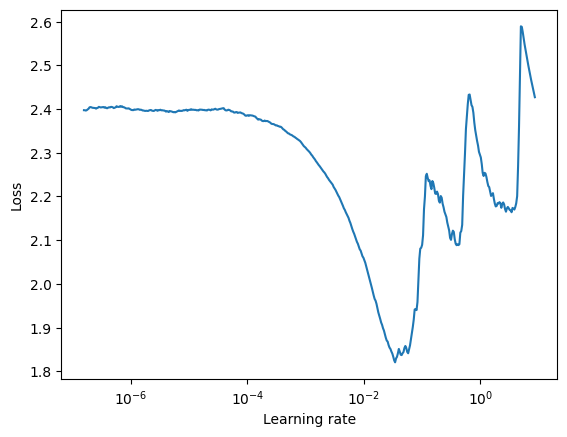

In [5]:
from lr_finder import LRFinder
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-7)
lr_finder = LRFinder(model, optimizer, criterion, device="cuda")
lr_finder.range_test(trainloader, end_lr=10, num_iter=500)
lr_finder.plot() # to inspect the loss-learning rate graph
lr_finder.reset() # to reset the model and optimizer to their initial state

In [6]:
# Training starts here
Training(20,model,device, trainloader, testloader )


EPOCH: 0


Loss=1.278096318244934 Batch_id=97 Accuracy=40.88: 100%|██████████| 98/98 [00:42<00:00,  2.31it/s]



Test set: Average loss: -3.1007, Accuracy: 5407/10000 (54.07%)

EPOCH: 1


Loss=1.0653648376464844 Batch_id=97 Accuracy=60.03: 100%|██████████| 98/98 [00:41<00:00,  2.34it/s]



Test set: Average loss: -4.4329, Accuracy: 6448/10000 (64.48%)

EPOCH: 2


Loss=0.817728579044342 Batch_id=97 Accuracy=68.55: 100%|██████████| 98/98 [00:41<00:00,  2.33it/s]



Test set: Average loss: -5.4193, Accuracy: 7090/10000 (70.90%)

EPOCH: 3


Loss=0.6417163014411926 Batch_id=97 Accuracy=74.25: 100%|██████████| 98/98 [00:41<00:00,  2.34it/s]



Test set: Average loss: -6.2994, Accuracy: 7117/10000 (71.17%)

EPOCH: 4


Loss=0.559924304485321 Batch_id=97 Accuracy=77.29: 100%|██████████| 98/98 [00:42<00:00,  2.31it/s]



Test set: Average loss: -6.4697, Accuracy: 7494/10000 (74.94%)

EPOCH: 5


Loss=0.5971036553382874 Batch_id=97 Accuracy=79.75: 100%|██████████| 98/98 [00:42<00:00,  2.33it/s]



Test set: Average loss: -7.6708, Accuracy: 7855/10000 (78.55%)

EPOCH: 6


Loss=0.4536270797252655 Batch_id=97 Accuracy=82.09: 100%|██████████| 98/98 [00:42<00:00,  2.33it/s]



Test set: Average loss: -7.8890, Accuracy: 7931/10000 (79.31%)

EPOCH: 7


Loss=0.43745240569114685 Batch_id=97 Accuracy=83.02: 100%|██████████| 98/98 [00:41<00:00,  2.33it/s]



Test set: Average loss: -8.8404, Accuracy: 8158/10000 (81.58%)

EPOCH: 8


Loss=0.4444332718849182 Batch_id=97 Accuracy=84.75: 100%|██████████| 98/98 [00:42<00:00,  2.31it/s]



Test set: Average loss: -8.7755, Accuracy: 8042/10000 (80.42%)

EPOCH: 9


Loss=0.3977550268173218 Batch_id=97 Accuracy=85.94: 100%|██████████| 98/98 [00:41<00:00,  2.34it/s]



Test set: Average loss: -9.2934, Accuracy: 8217/10000 (82.17%)

EPOCH: 10


Loss=0.39809566736221313 Batch_id=97 Accuracy=86.94: 100%|██████████| 98/98 [00:42<00:00,  2.33it/s]



Test set: Average loss: -9.0941, Accuracy: 8293/10000 (82.93%)

EPOCH: 11


Loss=0.38636794686317444 Batch_id=97 Accuracy=87.94: 100%|██████████| 98/98 [00:42<00:00,  2.33it/s]



Test set: Average loss: -10.1814, Accuracy: 8505/10000 (85.05%)

EPOCH: 12


Loss=0.32528871297836304 Batch_id=97 Accuracy=88.40: 100%|██████████| 98/98 [00:42<00:00,  2.32it/s]



Test set: Average loss: -10.0238, Accuracy: 8589/10000 (85.89%)

EPOCH: 13


Loss=0.29041698575019836 Batch_id=97 Accuracy=89.18: 100%|██████████| 98/98 [00:41<00:00,  2.34it/s]



Test set: Average loss: -10.2497, Accuracy: 8584/10000 (85.84%)

EPOCH: 14


Loss=0.2833097577095032 Batch_id=97 Accuracy=89.62: 100%|██████████| 98/98 [00:41<00:00,  2.34it/s]



Test set: Average loss: -10.1280, Accuracy: 8421/10000 (84.21%)

EPOCH: 15


Loss=0.2758190929889679 Batch_id=97 Accuracy=90.37: 100%|██████████| 98/98 [00:42<00:00,  2.32it/s]



Test set: Average loss: -11.5026, Accuracy: 8586/10000 (85.86%)

EPOCH: 16


Loss=0.288891077041626 Batch_id=97 Accuracy=90.90: 100%|██████████| 98/98 [00:42<00:00,  2.33it/s]



Test set: Average loss: -11.0962, Accuracy: 8571/10000 (85.71%)

EPOCH: 17


Loss=0.2981938123703003 Batch_id=97 Accuracy=91.27: 100%|██████████| 98/98 [00:42<00:00,  2.32it/s]



Test set: Average loss: -11.3430, Accuracy: 8603/10000 (86.03%)

EPOCH: 18


Loss=0.19736072421073914 Batch_id=97 Accuracy=91.54: 100%|██████████| 98/98 [00:42<00:00,  2.33it/s]



Test set: Average loss: -12.0123, Accuracy: 8681/10000 (86.81%)

EPOCH: 19


Loss=0.20702847838401794 Batch_id=97 Accuracy=92.43: 100%|██████████| 98/98 [00:42<00:00,  2.33it/s]



Test set: Average loss: -11.6094, Accuracy: 8661/10000 (86.61%)



In [7]:
# Calsswise accuracy
ClassTestAccuracy(testloader,device,model,classes)

Accuracy of plane : 85 %
Accuracy of   car : 100 %
Accuracy of  bird : 100 %
Accuracy of   cat : 50 %
Accuracy of  deer : 85 %
Accuracy of   dog : 66 %
Accuracy of  frog : 90 %
Accuracy of horse : 100 %
Accuracy of  ship : 100 %
Accuracy of truck : 100 %


In [16]:
!git clone https://github.com/jacobgil/pytorch-grad-cam.git

Cloning into 'pytorch-grad-cam'...
remote: Enumerating objects: 1115, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 1115 (delta 4), reused 11 (delta 3), pack-reused 1097
Receiving objects: 100% (1115/1115), 110.17 MiB | 15.85 MiB/s, done.
Resolving deltas: 100% (613/613), done.


In [21]:
cp -r pytorch-grad-cam_orig/pytorch_grad_cam .

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1344: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "
/usr/local/lib/python3.10/dist-packages/torch/nn/functional.py:3737: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


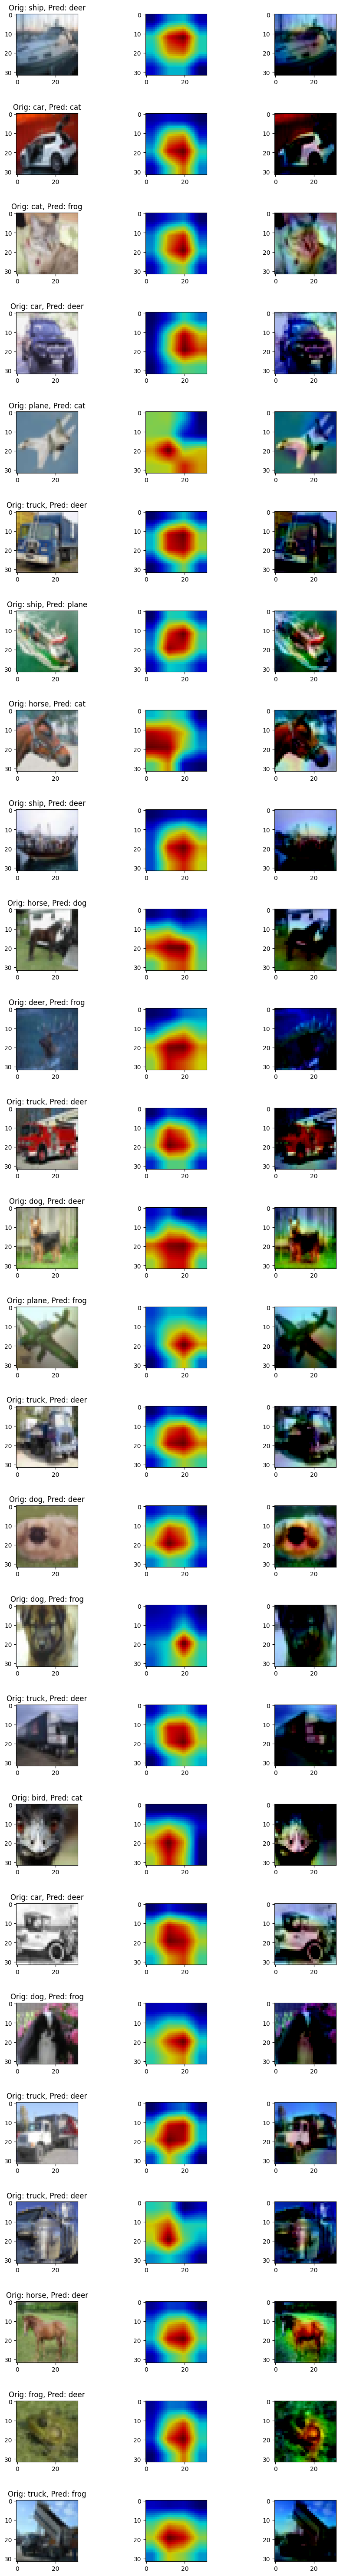

In [48]:
MissClassifedImage(testData,model,device,26,classes)

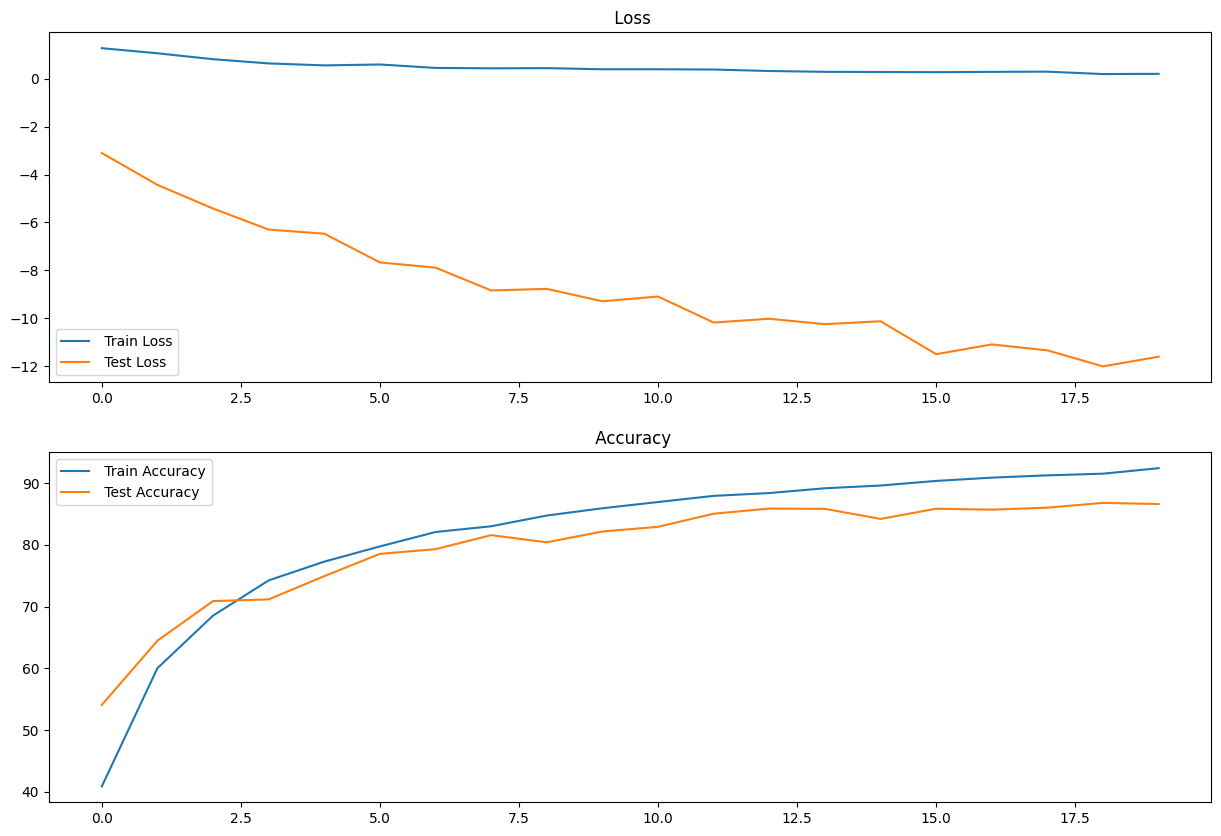

In [47]:
plotPerformanceGraph( )